In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
 df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
24511,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt

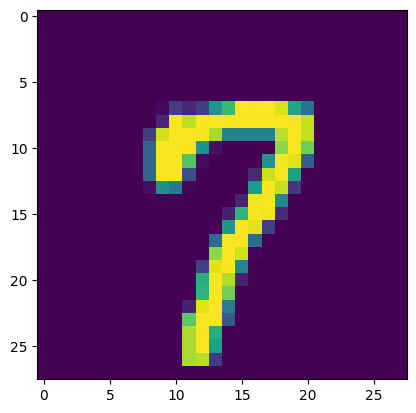

In [8]:
plt.imshow(df.iloc[34647,1:].values.reshape(28 , 28))

In [9]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35545,7,0,0,0,0,0,0,0,0,0,...,0,0,0,79,254,58,0,0,0,0


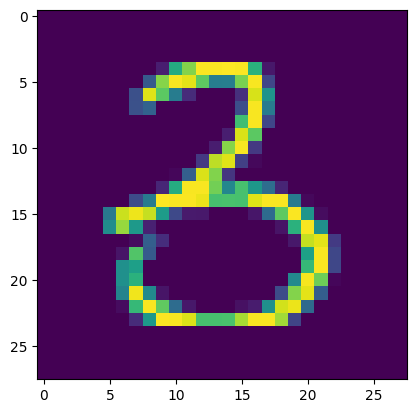

In [10]:
plt.imshow(df.iloc[7346,1:].values.reshape(28 , 28))

In [11]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [13]:
x_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [17]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

14.706580877304077


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.9648809523809524

In [19]:
#  from here we use PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [22]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [23]:
x_train.shape

(33600, 784)

In [24]:
pca = PCA(n_components=100)

In [25]:
start = time.time()
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
print(time.time() - start)

3.3975346088409424


In [26]:
x_train_trf.shape

(33600, 100)

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn.fit(x_train_trf , y_train)

KNeighborsClassifier()

In [29]:
y_predi = knn.predict(x_test_trf)

In [30]:
accuracy_score(y_test , y_predi)

0.9538095238095238

In [31]:
# doing again by changing n_components just to increase the accuracy
pca = PCA(n_components=200)

In [32]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(x_train_trf , y_train)

KNeighborsClassifier()

In [35]:
y_predi = knn.predict(x_test_trf)

In [36]:
accuracy_score(y_predi , y_test)

0.9507142857142857

In [70]:
# pca to increase accuracy by deciding its components or dimensions
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf , y_train)
    y_predi = knn.predict(x_test_trf)
    print(accuracy_score(y_predi , y_test))

0.25797619047619047
0.32392857142857145
0.5102380952380953
0.6661904761904762
0.7379761904761905
0.8225
0.8430952380952381
0.8720238095238095
0.8869047619047619
0.906547619047619
0.9114285714285715
0.9178571428571428
0.9280952380952381
0.935
0.9385714285714286
0.9376190476190476
0.9413095238095238
0.9416666666666667
0.9425
0.9448809523809524
0.944047619047619
0.9442857142857143
0.9445238095238095
0.9463095238095238
0.9476190476190476
0.9484523809523809
0.9478571428571428
0.9471428571428572
0.949047619047619
0.9495238095238095
0.950595238095238
0.9519047619047619
0.9508333333333333
0.9520238095238095
0.9510714285714286
0.9516666666666667
0.9521428571428572
0.9521428571428572
0.9538095238095238
0.9534523809523809
0.9513095238095238
0.9536904761904762
0.9538095238095238
0.9525
0.9532142857142857
0.9532142857142857
0.9546428571428571
0.9534523809523809
0.9538095238095238
0.9535714285714286
0.9538095238095238
0.9532142857142857
0.9541666666666667
0.9534523809523809
0.9533333333333334
0.9544

In [39]:
# pca for visualisation of many dimentional data into 1d , 2d , 3d
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [40]:
x_train_trf

array([[-2.71858128, -0.49034122],
       [-0.67722392, -6.75248804],
       [-3.03330462,  6.5113068 ],
       ...,
       [ 2.14861477,  0.7827199 ],
       [ 1.05963294,  0.94708809],
       [17.7024024 ,  1.96290516]])

In [41]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = x_train_trf[: , 0] , y = x_train_trf[: , 1] , color = y_train_trf , color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [44]:
# 3d
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [45]:
x_train_trf

array([[-2.71864044, -0.48987243,  1.13547073],
       [-0.67699005, -6.75363239, -2.33651649],
       [-3.03321174,  6.50989746,  7.49289587],
       ...,
       [ 2.14880876,  0.78078337, -0.74786821],
       [ 1.0595859 ,  0.9475036 ,  3.95055148],
       [17.70261661,  1.96177821, -4.94267789]])

In [46]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df , x = x_train_trf[: , 0] , y = x_train_trf[: , 1] , z = x_train_trf[: , 2] , color = y_train_trf)
fig.update_layout(margin = dict(l = 20 , r = 20 , t = 20 , b = 20))
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [47]:
pca.explained_variance_
# Eigen Value

array([40.67111197, 29.17023399, 26.74459548])

In [48]:
pca.components_

array([[ 1.00000000e+00,  2.62615035e-10, -2.21088205e-09, ...,
         3.00071387e-34, -1.33557837e-33,  1.84846405e-34],
       [-2.35924491e-10,  1.00000000e+00,  2.65528132e-08, ...,
         8.36999565e-34, -3.06551715e-34, -4.08633510e-34],
       [ 1.92018805e-09, -2.55909483e-08,  9.99999994e-01, ...,
         1.05778837e-34,  2.76596281e-34,  3.41451684e-35]])

In [50]:
pca.components_.shape
# Eigen Vectors

(3, 784)

In [51]:
# Finding best number of components in PCA to get the best accuracy of the model
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [52]:
pca = PCA(n_components = None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [55]:
pca.explained_variance_.shape

(784,)

In [57]:
pca.components_.shape

(784, 784)

In [58]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [59]:
np.cumsum(pca.explained_variance_ratio_)
# we need to check the 90% and where it comes 1st that number will be the best n_components for PCA
# Cumulative Sum like 1,2,3,4,5,6,7 = 1 , 1+2 , 1+2+3 , 1+2+3+4 ....................

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

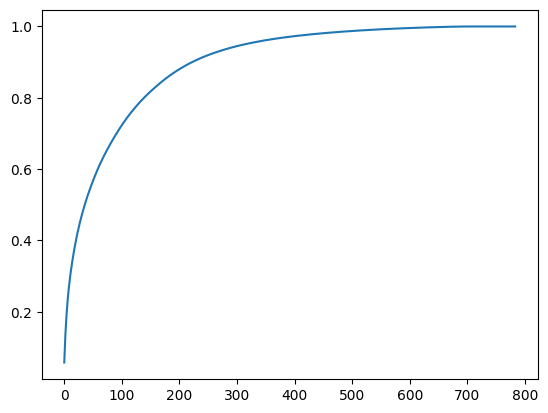

In [69]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))